# Facebook Social Network Analysis
## Sean O'Malley

------------------------------------------------

__Network Analysis__ comes from concept of network theory, which is the representation of symmetric relations between discrete objects. This analysis can be used to graph and understand various social and transportation networks. Primarily, network analysis helps us model relationships between entities, entity importance and find community structure within a network. 

Using Facebook survey participant data from the <a href="http://snap.stanford.edu/data/ego-Facebook.html">Stanford Network Analysis Project</a> we aim to: 

* _Understand the Network Structure_
    * Nodes
    * Edges
    * Degree 
    * Degree Centrality
    * Betweenness centrality
    
* _Visualize the Network_
    * Matrix
    * Circos
    * Arc

* _Find Groups Within the Network_
    * Triangles
    * Cliques
    * Maximal Cliques
    
* _Explore Subsets of Interest_

* _Determine the Network Influencers_
    * Characteristics of these nodes
    * Visualize within network
    
* _Recommend Friend Connections_
    * Open triangles

* _Summary_

* _Challenges & Lessons Learned_

A majority of the Facebook data has been anonymized by replacing the internal ids with new values, while also obsucring interpretation of many features. Allowing us to make connections by features, but without knowing their exact value and protecting the user.

------------------------------------------------


### __Import Packages__ : Facebook Network Analysis

In [1]:
import os
from glob import iglob
import numpy as np 
import pandas as pd
import networkx as nx
import gzip
import matplotlib.pyplot as plt

In [8]:
import nxviz as nv

### __Ingestion__ : Facebook Network Analysis

In [9]:
# Read in file, cast as string for cleaning
f = gzip.open('facebook_combined.txt.gz','rb')
content = str(f.read())
f.close()

# Clean up and cut off messy bookends
content = content[4:-8]
content = content.replace("\\n",",")
content = content.replace(" ",";")
content = content.split(";")
    
# Initialize Lists
output = []
clean = []
    
# Build list of lists
for i in content:
    x = i.split(",") 
    output.append(x)
        
# Cast as integers  
clean = [[int(x) for x in y] for y in output]

### __Understand__ : Facebook Network Analysis


In [10]:
g = nx.Graph()
g.add_edges_from(clean)

In [11]:
print("------------------------------------------")
print("The network has " + str(len(g.nodes())) + " nodes and " + str(len(g.edges())) + " edges. Confirming SNAP data structure.")
print("------------------------------------------")

------------------------------------------
The network has 4039 nodes and 88074 edges. Confirming SNAP data structure.
------------------------------------------


##### Remove Self Loops

We want to take a quick moment to find and remove any self loops. A self loop is a node connected to itself. We don't want these in our Facebook analysis because a self loop means someone who is friends with themselves. 

In [12]:
def find_selfloop_nodes(a):
    
    nodes_in_selfloops = []
    
    # Iterate over all the edges of G
    for k, v in a.edges(data=False):
        if k == v:
            nodes_in_selfloops.append(k)
            
    return nodes_in_selfloops

In [13]:
print("------------------------------------------")
print("We can see we have " + str(g.number_of_selfloops()) + " self loops that need to be removed.")
print(str(find_selfloop_nodes(g)))
print("------------------------------------------")

------------------------------------------
We can see we have 6 self loops that need to be removed.
[339, 1254, 1894, 657, 809, 2642]
------------------------------------------


In [14]:
g.remove_edges_from(g.selfloop_edges())

In [15]:
print("------------------------------------------")
print("We now have " + str(g.number_of_selfloops()) + " self loops remaining.")
print("------------------------------------------")

------------------------------------------
We now have 0 self loops remaining.
------------------------------------------


The following descriptive statistical network analysis methodologies attempt to answer the question.

> __How do you determine how important a node is, or is not?__


##### Degree 

The degree of a node in a network is the number of connections it has, while the degree distribution is the probability distribution of the degrees of nodes across the entire network.

To explore the degree of nodes from a high level, I have created a UDF to find the number of nodes given a number of connections. I placed this UDF into a loop in order to get a distribution of nodes by neighbor count.

In [26]:
def nodes_with_neighbors(G,m):
    nodes = set()
    for n in G.nodes(data=False):
        if len(list(G.neighbors(n))) == m:
            nodes.add(n)
    return nodes

six_nbrs = nodes_with_neighbors(g, m = 6)
print(six_nbrs)

{3074, 6, 3091, 2580, 533, 32, 44, 3632, 2100, 3127, 2621, 63, 3660, 77, 3661, 3665, 86, 3161, 95, 102, 3175, 1133, 2671, 117, 1151, 1664, 3724, 655, 1168, 3217, 3727, 147, 2721, 3745, 163, 3749, 3751, 691, 3270, 2767, 2774, 2776, 219, 3806, 1759, 229, 237, 1263, 1792, 2824, 3848, 269, 1297, 3859, 1301, 3370, 1838, 3893, 2358, 825, 1855, 2884, 2375, 846, 2899, 340, 2388, 3936, 1890, 3432, 873, 874, 365, 879, 3441, 3447, 887, 890, 3963, 895, 3457, 3970, 1924, 390, 3977, 3985, 3989, 3477, 3993, 3513, 2493, 2517, 1498, 987, 476, 3044, 3055, 1521, 498}


In [22]:
dg = [len(list(g.neighbors(n))) for n in g.nodes(data=False)]

##### Degree Centrality

The degree centrality takes the degree process a step further, by giving an importance score based on the number of links held by each node. Providing a measure of node connectivity in a simple equation

> __degree centrality__ = number of neighbors / number of total possible neighbors

In [17]:
dc = nx.degree_centrality(g)

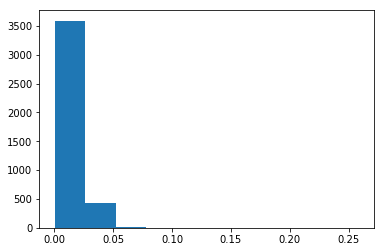

In [18]:
plt.figure()
plt.hist(list(dc.values()))
plt.show()

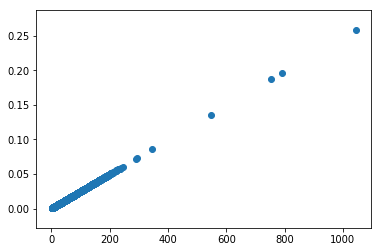

In [23]:
plt.figure()
plt.scatter(dg,list(dc.values()))
plt.show()

##### Betweenness Centrality 



##### Breadth First Search